In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [98]:
raw_df = pd.read_csv("../Oblig1/realestate.csv")
raw_df.head()

,Unnamed: 0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [99]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              414 non-null    int64  
 1   No                                      414 non-null    int64  
 2   X1 transaction date                     414 non-null    float64
 3   X2 house age                            414 non-null    float64
 4   X3 distance to the nearest MRT station  414 non-null    float64
 5   X4 number of convenience stores         414 non-null    int64  
 6   X5 latitude                             414 non-null    float64
 7   X6 longitude                            414 non-null    float64
 8   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [100]:
df = raw_df.copy()
df['target'] = df['Y house price of unit area']
df = df.drop(["Unnamed: 0", "No", 'Y house price of unit area'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [117]:
def split_dataset(data):
    train_val = data.sample(frac=0.8)
    test = data.drop(train_val.index)
    train = train_val.sample(frac=0.75)
    validation = train_val.drop(train.index)    
    return [train, validation, test]

# funksjon for å dele opp i targets og features
def split_targets_and_features(data):
    targets = data.target
    features = data.drop("target", axis=1)
    return [targets, features]

# hjelpe funksjon for oppdeling i features og targets
def create_set_of_targets_and_features(data):
    train = split_targets_and_features(data[0])
    validation = split_targets_and_features(data[1])
    test = split_targets_and_features(data[2])

    return [train, validation, test]

# funksjon for spliting av dataset
def create_full_dataset(input):
    data = split_dataset(input)
    dataset = create_set_of_targets_and_features(data)

    return dataset


(array([ 7., 11.,  9., 13., 20., 13.,  7.,  2.,  0.,  1.]),
 array([12.8 , 19.32, 25.84, 32.36, 38.88, 45.4 , 51.92, 58.44, 64.96,
        71.48, 78.  ]),
 <BarContainer object of 10 artists>)

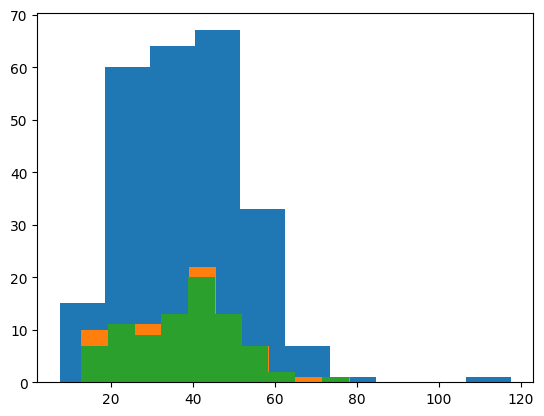

In [ ]:
test_spilt_data = split_dataset(df)
plt.hist(test_spilt_data[0]['target'])
plt.hist(test_spilt_data[1]['target'])
plt.hist(test_spilt_data[2]['target'])



In [ ]:
# hjelpe fuksjon for vurdering av modellene        
def evaluate_model(classifier, features, targets):
    predictions = classifier.predict(features)
    absolute = mean_absolute_error(targets, predictions)
    squared = mean_squared_error(targets, predictions)
    r2 = r2_score(targets, predictions) 

    return [absolute, squared, r2]

# hjelpe funksjon for å legg til verdier i resultat array i validate og test funksjonen 
def append_values(results, absolute, squared, r2):
        absolute.append(results[0])
        squared.append(results[1])
        r2.append(results[2])        

# hjelpe funksjon for å printe resultatene
def results_print(absolute, squared, r2):
    print(f'Mean absolute error: {np.mean(absolute):.2f} +- {np.std(absolute):.2f}')
    print(f'Mean squared error: {np.mean(squared):.2f} +- {np.std(squared):.2f}')
    print(f'R2 score: {np.mean(r2):.2f} +- {np.std(r2):.2f}')  

# funksjon for å trening og hyperparameter tuning av modellen med mulighet intern looping i fuksjonen.
def validate(classifier, runs):    
    train_absolute, train_squared, train_r2 = [], [], []
    validate_absolute, validate_squared, validate_r2 = [], [], []

    if(runs < 1): runs = 1

    for i in range(0, runs, 1):
        dataset = create_full_dataset(df)
        classifier.fit(dataset[0][1], dataset[0][0])
    
        results_train = evaluate_model(classifier, dataset[0][1], dataset[0][0])
        append_values(results_train, train_absolute, train_squared, train_r2)
    
        results_validate = evaluate_model(classifier, dataset[1][1], dataset[1][0])
        append_values(results_validate, validate_absolute, validate_squared, validate_r2)

    print('Training results:')
    results_print(train_absolute, train_squared, train_r2)
    print('************************')
    print('Validation results:')
    results_print(validate_absolute, validate_squared, validate_r2)

# funksjon for endelig testing av modellene med mulighet intern looping av fuksjonen.
def test(classifier, runs):
    absolute, squared, r2 = [], [], []

    if(runs < 1): runs = 1

    for i in range(0, runs, 1):
        dataset = create_full_dataset(df)
        classifier.fit(dataset[0][1], dataset[0][0])

        results = evaluate_model(classifier, dataset[2][1], dataset[2][0])
        append_values(results, absolute, squared, r2)
    
    print('************************')
    print('Test results:')
    results_print(absolute, squared, r2)


In [156]:
dt1 = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2)
validate(dt1, 50)

Training results:
Mean absolute error: 0.12 +- 0.05
Mean squared error: 0.39 +- 0.21
R2 score: 1.00 +- 0.00
************************
Validation results:
Mean absolute error: 6.17 +- 0.77
Mean squared error: 92.84 +- 41.72
R2 score: 0.49 +- 0.18


In [157]:
dt2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)
validate(dt2, 50)

Training results:
Mean absolute error: 3.54 +- 0.24
Mean squared error: 23.86 +- 3.86
R2 score: 0.87 +- 0.02
************************
Validation results:
Mean absolute error: 6.02 +- 0.84
Mean squared error: 95.96 +- 45.65
R2 score: 0.45 +- 0.24


In [159]:
dt3 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2)
validate(dt3, 50)

Training results:
Mean absolute error: 4.95 +- 0.25
Mean squared error: 49.33 +- 6.29
R2 score: 0.73 +- 0.03
************************
Validation results:
Mean absolute error: 5.68 +- 0.62
Mean squared error: 76.63 +- 30.39
R2 score: 0.59 +- 0.13


In [160]:
dt4 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=1, min_samples_split=2)
validate(dt4, 50)

Training results:
Mean absolute error: 5.67 +- 0.24
Mean squared error: 68.69 +- 8.78
R2 score: 0.63 +- 0.03
************************
Validation results:
Mean absolute error: 6.27 +- 0.59
Mean squared error: 85.47 +- 29.63
R2 score: 0.56 +- 0.07


In [161]:
dt5 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1, min_samples_split=2)
validate(dt5, 50)

Training results:
Mean absolute error: 4.30 +- 0.25
Mean squared error: 35.38 +- 4.73
R2 score: 0.81 +- 0.02
************************
Validation results:
Mean absolute error: 5.94 +- 0.75
Mean squared error: 87.28 +- 34.21
R2 score: 0.55 +- 0.15


In [162]:
dt6 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=5)
validate(dt6, 50)

Training results:
Mean absolute error: 4.98 +- 0.20
Mean squared error: 50.16 +- 6.43
R2 score: 0.73 +- 0.03
************************
Validation results:
Mean absolute error: 5.71 +- 0.73
Mean squared error: 73.99 +- 33.18
R2 score: 0.58 +- 0.15


In [163]:
dt7 = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=3)
validate(dt7, 50)

Training results:
Mean absolute error: 0.67 +- 0.13
Mean squared error: 3.69 +- 3.49
R2 score: 0.98 +- 0.02
************************
Validation results:
Mean absolute error: 6.29 +- 0.85
Mean squared error: 97.76 +- 37.84
R2 score: 0.45 +- 0.19


In [164]:
dt8 = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=4)
validate(dt8, 50)

Training results:
Mean absolute error: 1.14 +- 0.18
Mean squared error: 6.68 +- 5.11
R2 score: 0.96 +- 0.03
************************
Validation results:
Mean absolute error: 6.15 +- 0.76
Mean squared error: 95.18 +- 44.02
R2 score: 0.48 +- 0.23


In [171]:
dt9 = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=6)
validate(dt9, 50)

Training results:
Mean absolute error: 1.75 +- 0.19
Mean squared error: 9.42 +- 4.71
R2 score: 0.95 +- 0.02
************************
Validation results:
Mean absolute error: 6.26 +- 0.70
Mean squared error: 92.88 +- 39.78
R2 score: 0.49 +- 0.19


In [173]:
dt10 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=2)
validate(dt10, 50)

Training results:
Mean absolute error: 5.03 +- 0.25
Mean squared error: 53.51 +- 8.94
R2 score: 0.71 +- 0.03
************************
Validation results:
Mean absolute error: 5.81 +- 0.62
Mean squared error: 75.22 +- 26.01
R2 score: 0.60 +- 0.08


In [175]:
dt11 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=2)
validate(dt11, 50)

Training results:
Mean absolute error: 5.03 +- 0.24
Mean squared error: 53.46 +- 8.38
R2 score: 0.71 +- 0.03
************************
Validation results:
Mean absolute error: 5.73 +- 0.65
Mean squared error: 72.27 +- 28.02
R2 score: 0.62 +- 0.10


In [191]:
dt12 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=6, min_samples_split=2)
validate(dt12, 50)

Training results:
Mean absolute error: 5.09 +- 0.31
Mean squared error: 56.80 +- 9.91
R2 score: 0.70 +- 0.03
************************
Validation results:
Mean absolute error: 5.62 +- 0.63
Mean squared error: 66.14 +- 29.37
R2 score: 0.63 +- 0.10


In [192]:
dt13 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=8, min_samples_split=2)
validate(dt13, 50)

Training results:
Mean absolute error: 4.98 +- 0.28
Mean squared error: 52.79 +- 9.36
R2 score: 0.71 +- 0.03
************************
Validation results:
Mean absolute error: 5.85 +- 0.70
Mean squared error: 75.50 +- 30.47
R2 score: 0.61 +- 0.09


In [193]:
dt14 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=2)
validate(dt14, 50)

Training results:
Mean absolute error: 5.06 +- 0.29
Mean squared error: 56.11 +- 8.69
R2 score: 0.70 +- 0.03
************************
Validation results:
Mean absolute error: 5.67 +- 0.52
Mean squared error: 69.33 +- 25.31
R2 score: 0.63 +- 0.08


In [195]:
dt15 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=6, min_samples_split=10)
validate(dt15, 50)

Training results:
Mean absolute error: 5.02 +- 0.27
Mean squared error: 54.94 +- 9.28
R2 score: 0.70 +- 0.03
************************
Validation results:
Mean absolute error: 5.74 +- 0.70
Mean squared error: 71.52 +- 29.92
R2 score: 0.63 +- 0.10


In [196]:
dt16 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=6, min_samples_split=15)
validate(dt16, 50)

Training results:
Mean absolute error: 5.00 +- 0.28
Mean squared error: 54.11 +- 9.10
R2 score: 0.71 +- 0.03
************************
Validation results:
Mean absolute error: 5.64 +- 0.62
Mean squared error: 69.90 +- 27.91
R2 score: 0.63 +- 0.09


In [197]:
dt17 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=6, min_samples_split=20)
validate(dt17, 50)

Training results:
Mean absolute error: 5.01 +- 0.26
Mean squared error: 54.18 +- 8.76
R2 score: 0.71 +- 0.03
************************
Validation results:
Mean absolute error: 5.82 +- 0.59
Mean squared error: 72.60 +- 28.55
R2 score: 0.62 +- 0.08


In [153]:
lr1 = LinearRegression(tol=1e-4)
validate(lr1, 50)

Training results:
Mean absolute error: 6.05 +- 0.24
Mean squared error: 74.73 +- 10.77
R2 score: 0.59 +- 0.04
************************
Validation results:
Mean absolute error: 6.48 +- 0.59
Mean squared error: 86.67 +- 27.66
R2 score: 0.55 +- 0.09


In [135]:
lr2 = LinearRegression(tol=1e-3)
validate(lr2, 50)

Training results:
Mean absolute error: 6.07 +- 0.29
Mean squared error: 73.24 +- 12.57
R2 score: 0.60 +- 0.04
************************
Validation results:
Mean absolute error: 6.34 +- 0.72
Mean squared error: 86.63 +- 36.46
R2 score: 0.56 +- 0.11


In [152]:
lr3 = LinearRegression(tol=1e-2)
validate(lr3, 50)

Training results:
Mean absolute error: 6.09 +- 0.29
Mean squared error: 74.32 +- 13.02
R2 score: 0.59 +- 0.04
************************
Validation results:
Mean absolute error: 6.12 +- 0.56
Mean squared error: 75.38 +- 28.49
R2 score: 0.58 +- 0.09


In [154]:
lr4 = LinearRegression(tol=1e-1)
validate(lr4, 50)

Training results:
Mean absolute error: 6.05 +- 0.34
Mean squared error: 73.99 +- 12.76
R2 score: 0.59 +- 0.04
************************
Validation results:
Mean absolute error: 6.39 +- 0.67
Mean squared error: 84.80 +- 31.93
R2 score: 0.56 +- 0.09


In [138]:
lr5 = LinearRegression(tol=1e-5)
validate(lr5, 50)

Training results:
Mean absolute error: 6.12 +- 0.30
Mean squared error: 77.99 +- 12.02
R2 score: 0.58 +- 0.04
************************
Validation results:
Mean absolute error: 6.32 +- 0.70
Mean squared error: 80.55 +- 32.40
R2 score: 0.57 +- 0.10


In [139]:
lr6 = LinearRegression(tol=1e-6)
validate(lr6, 50)

Training results:
Mean absolute error: 6.06 +- 0.30
Mean squared error: 75.30 +- 13.04
R2 score: 0.59 +- 0.04
************************
Validation results:
Mean absolute error: 6.20 +- 0.62
Mean squared error: 78.34 +- 31.90
R2 score: 0.57 +- 0.09


In [201]:
lr7 = LinearRegression(tol=1e-7)
validate(lr7, 50)

Training results:
Mean absolute error: 6.14 +- 0.35
Mean squared error: 76.77 +- 13.72
R2 score: 0.59 +- 0.05
************************
Validation results:
Mean absolute error: 6.38 +- 0.62
Mean squared error: 82.17 +- 32.40
R2 score: 0.56 +- 0.10


In [205]:
print("DecisionTreeRegressor:")
validate(dt12, 50)
test(dt12, 50)
print("\n***************\n")
print("LinearRegression:")
validate(lr3, 50)
test(lr3, 50)

DecisionTreeRegressor:
Training results:
Mean absolute error: 5.04 +- 0.27
Mean squared error: 55.72 +- 8.65
R2 score: 0.70 +- 0.03
************************
Validation results:
Mean absolute error: 5.69 +- 0.60
Mean squared error: 67.38 +- 24.56
R2 score: 0.63 +- 0.08
************************
Test results:
Mean absolute error: 5.69 +- 0.62
Mean squared error: 68.50 +- 26.52
R2 score: 0.62 +- 0.08

***************

LinearRegression:
Training results:
Mean absolute error: 6.10 +- 0.29
Mean squared error: 76.91 +- 12.33
R2 score: 0.59 +- 0.04
************************
Validation results:
Mean absolute error: 6.30 +- 0.67
Mean squared error: 81.45 +- 34.16
R2 score: 0.56 +- 0.09
************************
Test results:
Mean absolute error: 6.30 +- 0.57
Mean squared error: 77.05 +- 27.09
R2 score: 0.59 +- 0.09
